<a href="https://colab.research.google.com/github/LastChanceKatze/image-caption-gen/blob/main/img_caption_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google play store apps dataset analysis and preparation**
Dataset analysis and data preparation for app recommender system.
*Dataset* https://www.kaggle.com/lava18/google-play-store-apps.

## ***Imports***

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## ***Read and show data from csv***

In [61]:
df = pd.read_csv('./Dataset/googleplaystore.csv')

In [62]:
df.shape

(10841, 13)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [64]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## ***Rating***

In [65]:
df[['Rating']].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


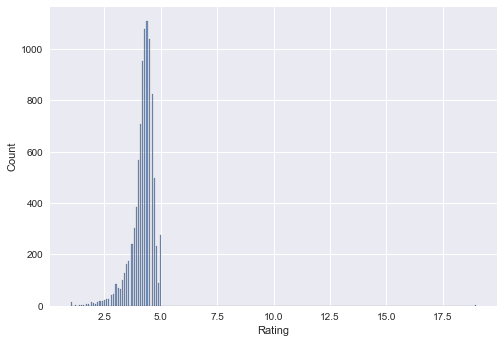

In [66]:
sns.histplot(x=df['Rating'])
plt.show()

Removing outliers in Rating. Application can't have rating greater than 5.

In [67]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [68]:
df.drop(10472,axis=0,inplace=True)
df.shape

(10840, 13)

In [69]:
df.set_index([[i for i in range(10840)]],inplace=True)
df[['Rating']].describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


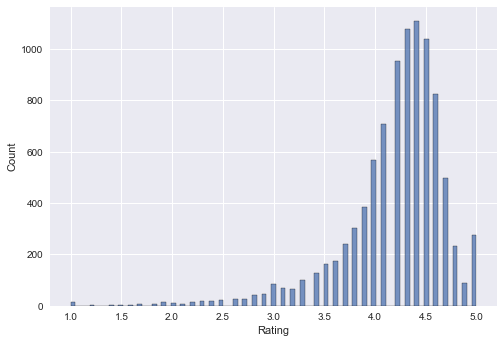

In [70]:
sns.histplot(x=df['Rating'])
plt.show()

## ***Filling NaN rating values based on Reviews***

In [71]:
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

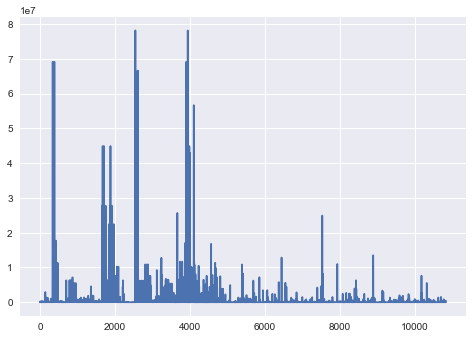

In [72]:
df['Reviews'].plot(kind='line')
plt.show()

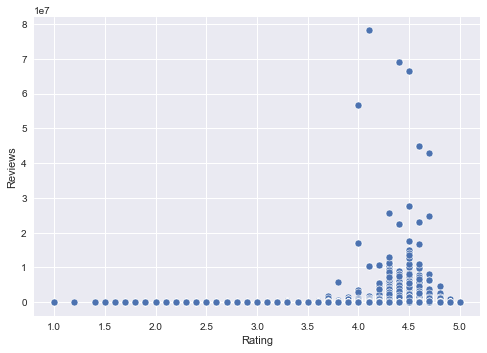

In [73]:
sns.scatterplot(data=df[['Reviews','Rating']],x='Rating',y='Reviews')
plt.show()

Mean Reviews of apps with rating <=1.

In [74]:
df['Reviews'][df['Rating'] <=1 ].mean()

1.75

Mean Reviews of apps with rating >1 and <=2.

In [75]:
df['Reviews'][(df['Rating'] >1)&(df['Rating'] <=2) ].mean()

258.65384615384613

Mean Reviews of apps with rating >2 and <=3.

In [76]:
df['Reviews'][(df['Rating'] >2)& (df['Rating'] <=3) ].mean()

1391.228476821192

Mean Reviews of apps with rating >3 and <=4.

In [77]:
df['Reviews'][(df['Rating'] >3)& (df['Rating'] <=4) ].mean()

147931.15163934426

Mean Reviews of apps with rating >4.

In [78]:
df['Reviews'][df['Rating'] > 4 ].mean()

660191.2251470588

In [79]:
apps_no_rating = df[df['Rating'].isnull()]
apps_no_rating[['Reviews']].describe()

,Reviews
count,1474.000000
mean,18.062415
std,139.912271
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,3248.000000


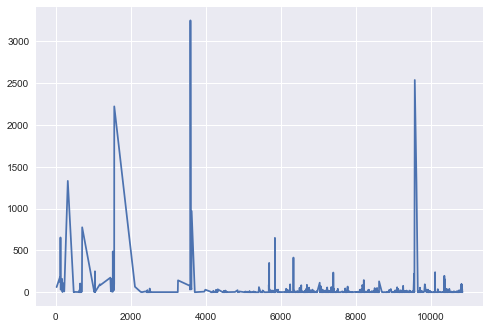

In [80]:
apps_no_rating['Reviews'].plot(kind='line')
plt.show()

Since Maximum reviews is <5000 I set all app NaN ratings to 2.5.

In [81]:
df['Rating'].fillna(2.5,inplace=True)
df['Rating'].isna().sum()

0

## ***Other features analysis and transformation***

In [82]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Category column**

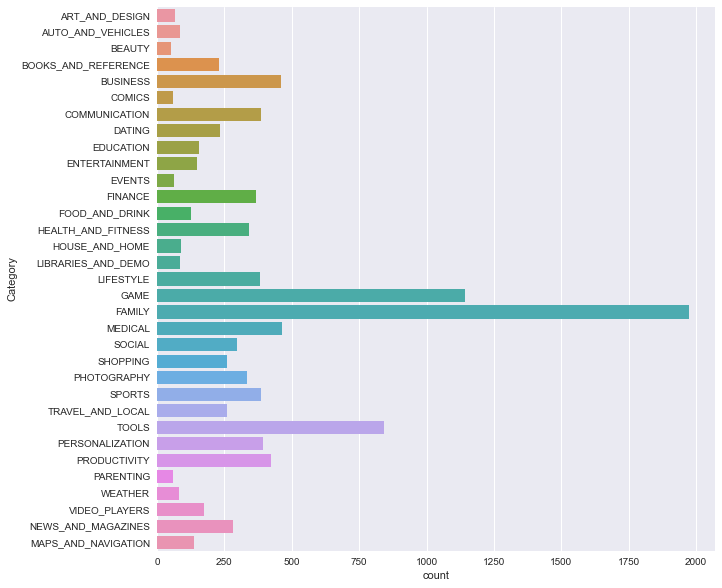

In [83]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Category'])
plt.show()

**Genres column**

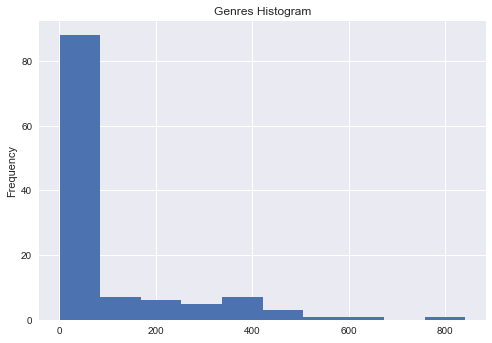

In [84]:
df['Genres'].value_counts().plot(kind='hist')
plt.title("Genres Histogram")
plt.show()

Dropping Genres column because we had Category column.

In [85]:
df.drop('Genres',inplace=True,axis=1)

**Size column**

Two types of size values are given, some are given in KB, other in MB. So we will convert all to MB to have same range of value. Some applications have value ***'Varies with device'*** for size column. Those will be replaced with -1, for not knowing the size.

In [86]:
size_in_mb = df['Size'][df['Size'].str.contains('M')]
size_in_mb = size_in_mb.str.replace('M','')
size_in_mb = pd.to_numeric(size_in_mb)
size_in_mb.shape

(8829,)

In [87]:
size_in_kb = df['Size'][(df['Size'].str.contains('k'))]
size_in_kb = size_in_kb.str.replace('k','')
size_in_kb = pd.to_numeric(size_in_kb)
size_in_kb.shape

(316,)

In [88]:
size_in_kb = size_in_kb *0.001
size_in_kb.head()

58     0.201
209    0.023
384    0.079
450    0.118
458    0.695
Name: Size, dtype: float64

In [89]:
varies_with_device = df['Size'][df['Size'] == 'Varies with device']
varies_with_device.replace('Varies with device',-1,inplace=True)

In [90]:
Size = [None for i in range(10840)]
def set_size(data):
    for index in data.index:
        try:
            Size[index] = data.loc[index]
        except:
            print(index)

set_size(size_in_kb)
set_size(size_in_mb)
set_size(varies_with_device)

df['Size'] = Size
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up


**Installs column**

Installs column has to be converted to numeric type.

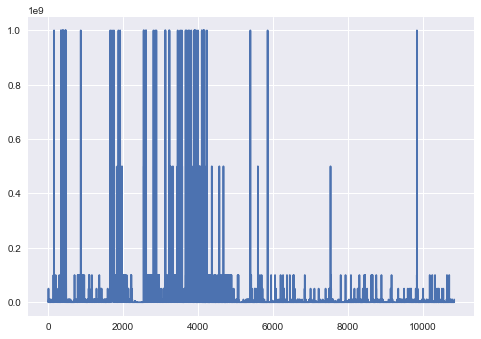

In [91]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(r'\D+','',regex=True))
df['Installs'].plot(kind='line')
plt.show()

**Type and Price columns**

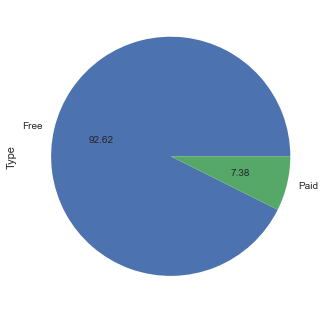

In [92]:
df['Type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [93]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

Convert price to numeric value and set price for free apps to 0.

In [94]:
pd.to_numeric(df['Price'][df['Type'] == 'Free']).sum()

0

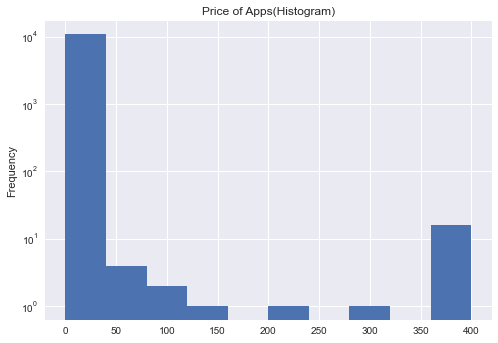

In [95]:
df['Price'] = df['Price'].str.replace(r'\$','',regex=True)
df['Price'] = pd.to_numeric(df['Price'])
df['Price'].plot(kind='hist')
plt.title("Price of Apps(Histogram)")
plt.yscale('log')

**Content Rating**

In [96]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [97]:
df['Content Rating'] = df['Content Rating'].replace(["Adults only 18+","Unrated"],["Everyone","Everyone"])
df['Content Rating'].value_counts()

Everyone        8719
Teen            1208
Mature 17+       499
Everyone 10+     414
Name: Content Rating, dtype: int64

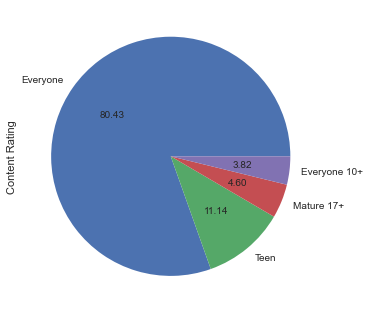

In [98]:
df['Content Rating'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

**Last Updated and Current Ver columns**

These columns don't have usefull data so we will not use them.

In [99]:
df.drop('Last Updated',axis=1,inplace=True)
df.drop('Current Ver',axis=1,inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4 and up


**Android Version column**

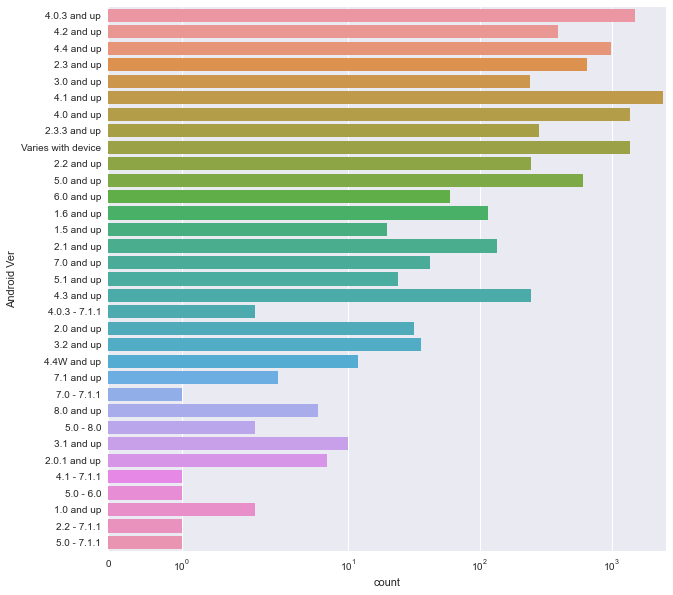

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Android Ver'])
plt.xscale('symlog')
plt.show()

Setting Android Versions to others whose frequency is <100.

In [101]:
other_versions = df['Android Ver'].value_counts()
other_versions[other_versions<=100].sum()

263

In [102]:
other_versions = other_versions[other_versions<=100].keys()
other_versions

Index(['6.0 and up', '7.0 and up', '3.2 and up', '2.0 and up', '5.1 and up',
       '1.5 and up', '4.4W and up', '3.1 and up', '2.0.1 and up', '8.0 and up',
       '7.1 and up', '4.0.3 - 7.1.1', '5.0 - 8.0', '1.0 and up', '7.0 - 7.1.1',
       '4.1 - 7.1.1', '5.0 - 6.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype='object')

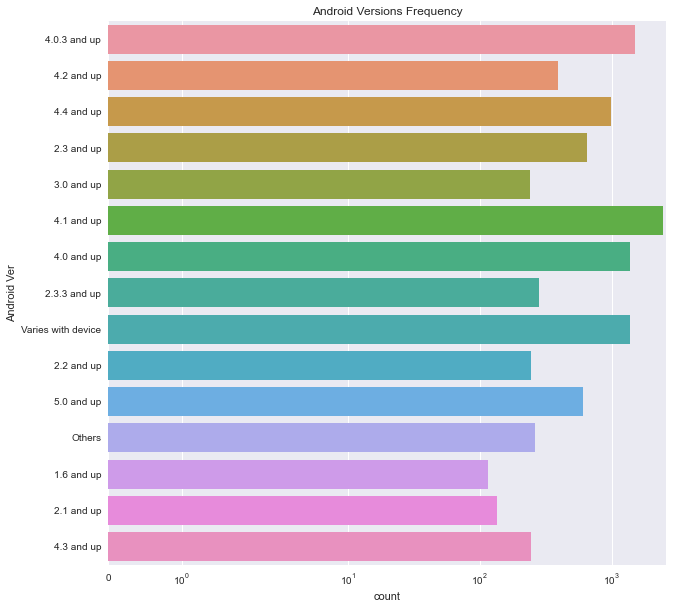

In [103]:
df['Android Ver'].replace(other_versions,['Others' for i in range(19)], inplace=True)

plt.figure(figsize=(10,10))
sns.countplot(y=df['Android Ver'])
plt.xscale('symlog')
plt.title("Android Versions Frequency")
plt.show()

## ***Preprocessing data for Recommender system model***

In [104]:
app_names = pd.DataFrame({'App':df['App']})
app_names.head()

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book


In [105]:
df.set_index('App',inplace=True)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4 and up


Drop rows with any value NaN left.

In [106]:
df.dropna(how='any',inplace=True)
df.shape

(10837, 9)

**One Hot Encoding**

In [107]:
cols_to_encode = df.dtypes[df.dtypes == 'object'].keys()
cols_to_encode

Index(['Category', 'Type', 'Content Rating', 'Android Ver'], dtype='object')

In [108]:
dummies = pd.get_dummies(df[cols_to_encode])
dummies.sample(5)

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Android Ver_3.0 and up,Android Ver_4.0 and up,Android Ver_4.0.3 and up,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_5.0 and up,Android Ver_Others,Android Ver_Varies with device
App,,,,,,,,,,,,,,,,,,,,,
Snap Cat Face Camera,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EW Manager,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Familial Hypercholesterolaemia Handbook,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
The CW TN app 2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
UniFi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [109]:
df.drop(cols_to_encode,axis=1,inplace=True)
df.head()

,Rating,Reviews,Size,Installs,Price
App,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0
Coloring book moana,3.9,967,14.0,500000,0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7,5000000,0.0
Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0


In [110]:
df.shape,dummies.shape

((10837, 5), (10837, 54))

In [111]:
new_df = pd.concat([df,dummies],axis=1)
new_df.shape

(10837, 59)

In [112]:
new_df.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Android Ver_3.0 and up,Android Ver_4.0 and up,Android Ver_4.0.3 and up,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_5.0 and up,Android Ver_Others,Android Ver_Varies with device
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Coloring book moana,3.9,967,14.0,500000,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8.7,5000000,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Feature Scaling**

In [113]:
xdf = new_df.copy(deep=True)
cols_to_scale = "Rating 	Reviews 	Size 	Installs 	Price".split(" 	")
cols_to_scale

['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [114]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

scalled = scale.fit_transform(xdf[cols_to_scale])

i=0
for col in cols_to_scale:
    xdf[col] = scalled[:,i]
    print(col)
    i += 1

Rating
Reviews
Size
Installs
Price


**Data Contains Duplicate Values**

In [115]:
xdf['App']=xdf.index
xdf.drop_duplicates(subset='App',inplace=True)
xdf.shape

(9656, 60)

In [116]:
xdf.drop('App',axis=1,inplace=True)
xdf.shape

(9656, 59)

In [117]:
app_names = pd.DataFrame({'App':xdf.index})
app_names.shape

(9656, 1)

## ***Saving Prepared dataset for recommender system***

In [118]:
xdf.to_csv('Cleaned_Data.csv',index=False)
app_names.to_csv("App_Names.csv",index=False)